In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Load data

In [3]:
stores = pd.read_csv('../data/stores.csv',index_col=0)

In [4]:
features = pd.read_csv('../data/features.csv')

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Plots

## Plotting using pandas plotting

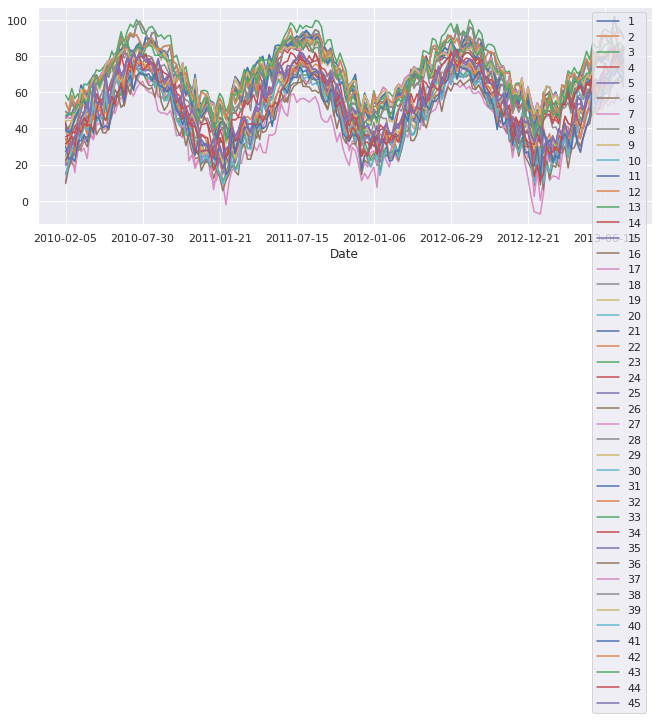

In [6]:
fig,ax = plt.subplots()
for name,grp in features.groupby('Store'):
    grp.plot('Date','Temperature',label=name,ax=ax)

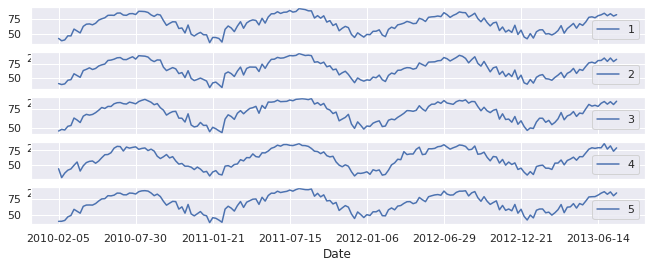

In [7]:
numfigs = 5
fig,ax = plt.subplots(nrows=5)
figid = 0
for name,grp in features.groupby('Store'):
    grp.plot('Date','Temperature',label=name,ax=ax[figid])
    figid += 1
    if figid>=numfigs:
        break

## Plot using seaborn

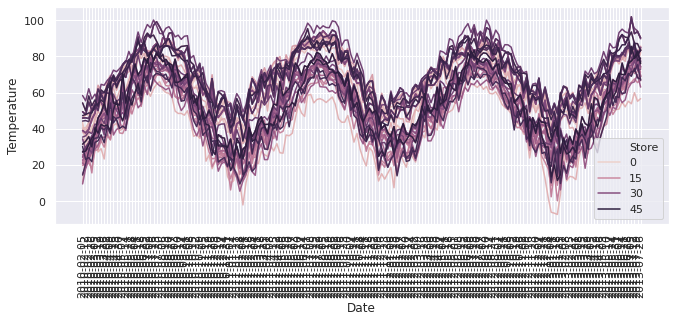

In [8]:
sns.lineplot(data=features, x="Date", y="Temperature", hue="Store")
xticks = plt.xticks(rotation=90)

## Plotting using matplotlib

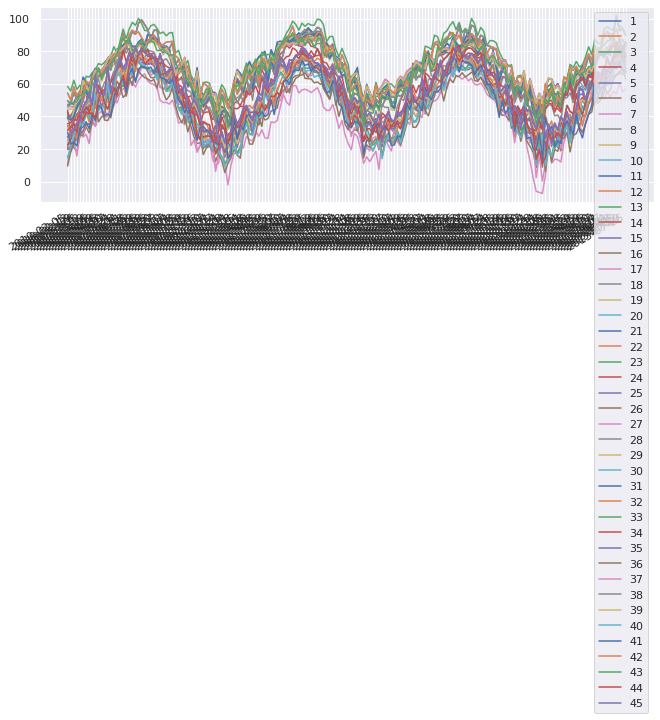

In [9]:
fig,ax = plt.subplots()
for name,grp in features.groupby('Store'):
    ax.plot(grp['Date'],grp['Temperature'],label=name)
# xticks = plt.xticks(rotation=90)
fig.autofmt_xdate()
ax.legend()

## Use pandas 

In [10]:
def plot_store_series(df, xval, yval, store, ax=None):
    
    if ax:
        df[df['Store']==store].plot(x=xval, y=yval, label=str(store)+'-'+yval, ax=ax)
    else:
        df[df['Store']==store].plot(x=xval, y=yval, label=str(store)+'-'+yval)

# Store-level

## Plot temperature for a store

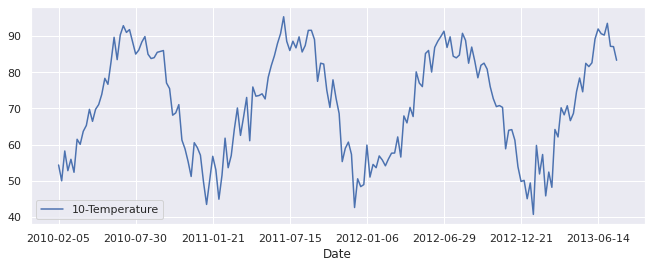

In [11]:
plot_store_series(features,'Date','Temperature',10)

## Plot fuel price for a store

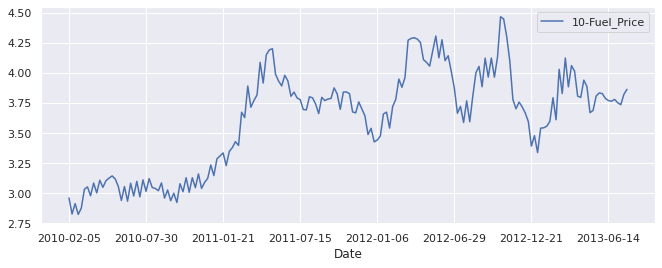

In [12]:
plot_store_series(features,'Date','Fuel_Price',10)

## Plot unemployment for a store

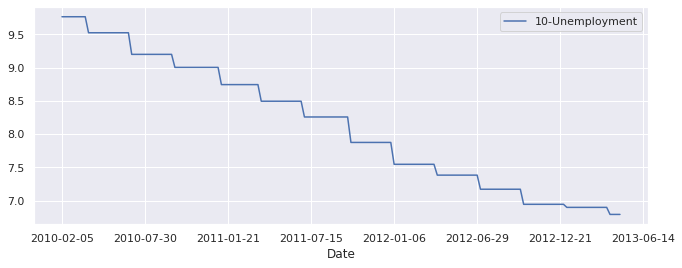

In [13]:
plot_store_series(features,'Date','Unemployment',10)

## Plot CPI for a store

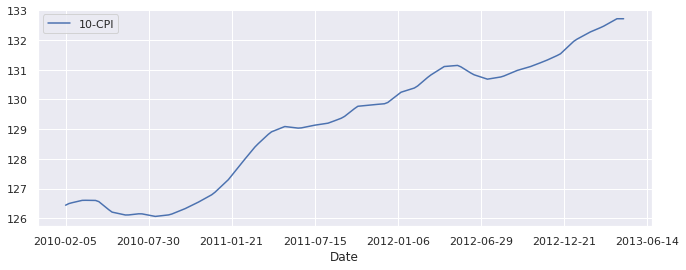

In [14]:
plot_store_series(features,'Date','CPI',10)

## Plot markdowns

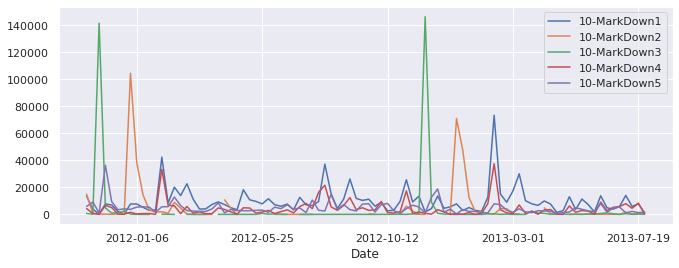

In [15]:
fig,ax = plt.subplots()

for c in features.columns.tolist():
    if 'MarkDown' in c:
        plot_store_series(features,'Date',c,10,ax)